[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-04.ipynb)


* 강좌 보기 : https://www.boostcourse.org/ds214/


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
# 데이터셋을 미리보기 합니다.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df['Outcome']
y.shape

(768,)

In [7]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [8]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [9]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

## 머신러닝 알고리즘 사용하기
* [결정 트리 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC)
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)
* [랜덤 포레스트 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)
* [배깅 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B0%B0%EA%B9%85)
<img src="https://upload.wikimedia.org/wikipedia/commons/8/83/0_jW2hAGmYEFH0RP9W.png">

이미지 출처 : https://upload.wikimedia.org/wikipedia/commons/8/83/0_jW2hAGmYEFH0RP9W.png

트리를 앙상블 기법(여러 기법을 섞어서 사용하는 기법)에 사용할 수 있습니다.

Random Forest는 샘플링하여 여러 데이터를 만들며, 이 샘플은 부트스트랩이라고 합니다.

이를 통해 오버피팅을 방지할 수 있습니다.

In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

결정 트리로 모델을 만들어봅니다.

## 학습과 예측하기

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

학습을 시킵니다.

In [12]:
y_predict = model.predict(X_test)
y_predict[:5]

array([0, 0, 0, 0, 0], dtype=int64)

예측을 하고 결과를 y_predict에 담습니다. 

## 정확도(Accuracy) 측정하기

In [13]:
(y_predict != y_test).sum() #예측과 살제 값이 다른 것(False)값 총합

28

다르게 예측한 데이터들을 카운트하여 갯수를 세줍니다.

In [14]:
# accuracy socre를 구합니다
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8181818181818182

정확도를 계산합니다.

### 랜덤포레스트

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

랜덤포레스트를 사용합니다.

In [16]:
model.fit(X_train, y_train) # 모델을 학습합니다.

GradientBoostingClassifier(random_state=42)

In [17]:
y_predict = model.predict(X_test)
y_predict[:5] # 결과를 예측합니다.

array([1, 0, 0, 0, 0], dtype=int64)

In [18]:
(y_predict != y_test).sum()

24

DecisionTree에서 28개였는데 20개로 줄었습니다.

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441

점수가 상승했습니다.

랜덤 포레스트는 트리를 여러 개 만들어 시각화가 어렵습니다.

In [20]:
model.feature_importances_ # feature 별로 중요도를 계산합니다.

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

<Axes: >

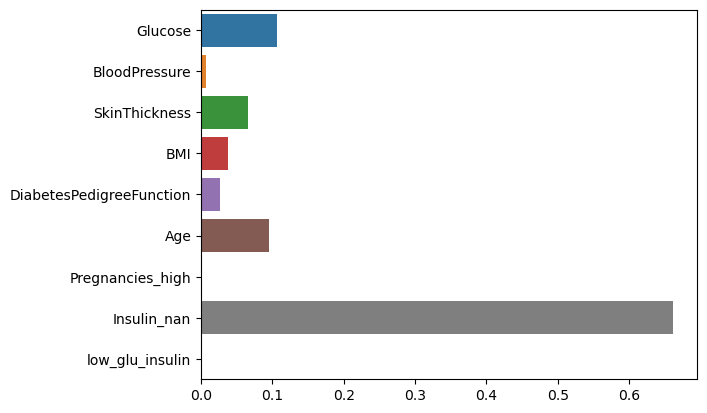

In [21]:
feature_names = X_train.columns.tolist()
 
sns.barplot(x=model.feature_importances_, y=feature_names)

인슐린이 가장 중요한 역할을 합니다. 대부분의 트리 알고리즘에서는 feature_importance를 알 수 있습니다.

## 그라디언트 부스팅 알고리즘 사용하기

###  Single tree

트리 하나만 사용

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)
# model

### Bagging

트리 여러개 샘플링하여 사용

RandomForest 알고리즘 사용

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model

### Boosting
* https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

<img src="https://quantdare.com/wp-content/uploads/2016/04/bb3.png" width="600">

샘플링 할 때에 결과값에 가중치 적용

sequential하게 샘플링 한 것을 가중치 적용 후 다음 샘플링에 사용

single 은 하나의 트리를 사용하고, bagging 은 트리를 여러 개 사용합니다. boosting은 트리에 가중치를 부여합니다.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier # 당뇨병 여부를 판단하기 때문에 Classifier 사용

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

앙상블에 있는 그라디언트부스팅을 사용합니다.

처음에는 max depth=10으로 지정했지만 오히려 성능이 더 안 좋아지는 경우가 발생했습니다.

그러므로 max_depth를 제거하고 모델을 학습시킵니다.

## 학습과 예측하기

In [28]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [29]:
# feature 간의 중요도를 확인합니다.
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

In [25]:
feature_names = X_train.columns.tolist()

<Axes: >

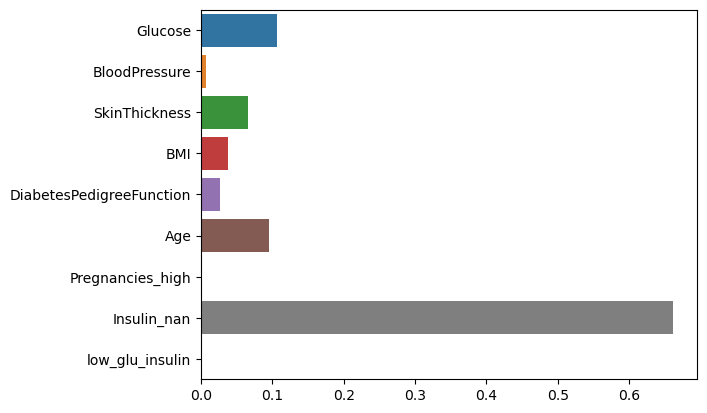

In [26]:
sns.barplot(x=model.feature_importances_, y=feature_names)

Insulin이 영향을 많이 미친 것으로 나타났습니다.

In [ ]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

## 정확도(Accuracy) 측정하기

In [ ]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.
# DT : 28 (Decision Tree)
# RF : 20 (Random Forest)
# GB : 24 (GradientBoosting)
(y_predict != y_test).sum()

24

랜덤 포레스트에서는 20개였는데 그라디언트 부스팅에서는 24개입니다.

랜덤 포레스트의 성능이 더욱 좋은 것을 확인할 수 있습니다.

In [ ]:
# accuracy score를 구합니다.
# DT: 0.818
# RF: 0.870
# GBL 0.844 (GradientBoosting)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441

## RamdomSearchCV 로 여러 알고리즘의 최적의 하이퍼 파라미터를 찾기

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth,
"max_features": max_features}
 
clf = RandomizedSearchCV(estimator,
param_distributions,
n_iter=100,
scoring="accuracy",
n_jobs=-1,
cv=5,
verbose=2
)

clf.fit(X_train, y_train)

param_distributions에 랜덤 서치를 위한 변수들을 딕셔너리 형태로 넣습니다.

n_iter으로 기본 10번을 반복 학습합니다.

n_jobs를 -1으로 지정하여 사용할 수 있는 자원을 모두 활용합니다.

cv를 5로 하여 조각을 5개로 나눕니다.

verbose를 2로 지정하여 로그를 찍습니다.

In [ ]:
clf.best_params

In [ ]:
clf.best_score_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
RandomForestClassifier(random_state=42),
GradientBoostingClassifier(random_state=42)
]
estimators

3개의 알고리즘을 모두 선언하여 사용해보고자 합니다.

In [ ]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results​

3개의 모델을 for문으로 접근할 수 있고, results 리스트에 계속 모델 이름을 담도록 합니다.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
        
    clf = RandomizedSearchCV(estimator, 
                       param_distributions, 
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5, 
                       verbose=2
                      )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

clf를 estimators가 있는 for문 안으로 넣어서 3개의 모델을 모두 번갈아 학습시킬 수 있도록 합니다.

Decision Tree는 n_estimators라는 트리의 개수를 뜻하는 파라미터를 사용할 수 있습니다.

n_estimators의 크기가 클수록 모델을 학습하는 데에 시간이 오래 걸립니다.
 
각 모델 중에서 가장 좋은 스코어를 result에 기록합니다.

In [ ]:
df = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

모델 별로 가장 성능이 좋은 파라미터 수치를 알 수 있습니다.

In [ ]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")

모델에 각각 접근하여 상위에 있는 모델 순서대로 보거나 정확한 parameter 설정 수치를 볼 수 있습니다.
 
좋은 성능이 나오는 구간으로 계속 iteration을 돌릴 필요가 있습니다.

하이퍼 파라미터 튜닝을 여러 번 할수록 좋은 성능을 얻을 수 있습니다.